In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('cve.csv')
df.head()


,Unnamed: 0,mod_date,pub_date,cvss,cwe_code,cwe_name,Unnamed: 6
0,CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF),NaN
1,CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...,NaN
2,CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key,NaN
3,CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...,NaN
4,CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...,NaN


In [29]:
df.drop(columns=['Unnamed: 6'], inplace=True)
df.rename(columns={"Unnamed: 0": "CVE"}, inplace=True)
df_CVE = df.set_index('CVE')

df_CVE

,mod_date,pub_date,cvss,cwe_code,cwe_name
CVE,,,,,
CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF)
CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...
CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key
CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...
CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...
...,...,...,...,...,...
CVE-2007-6444,10/01/2008 5:00,19/12/2007 22:46,5.0,20,Improper Input Validation
CVE-2007-6443,10/01/2008 5:00,19/12/2007 22:46,5.0,119,Improper Restriction of Operations within the...
CVE-2007-6442,10/01/2008 5:00,19/12/2007 22:46,5.0,119,Improper Restriction of Operations within the...


In [30]:
def catagorize_vuln(cvss):
    if cvss>6.5:
            
        return 'high'
    elif cvss <=6.4 and cvss>4:
        return 'medium'
    else:
        return 'low'

df["Severity"] = df["cvss"].apply(catagorize_vuln) 
df.head()

,CVE,mod_date,pub_date,cvss,cwe_code,cwe_name,Severity
0,CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF),high
1,CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...,low
2,CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key,medium
3,CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...,medium
4,CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...,high


In [31]:
df.drop(['cvss'], axis=1, inplace=True )
df.head()


,CVE,mod_date,pub_date,cwe_code,cwe_name,Severity
0,CVE-2019-16548,21/11/2019 15:15,21/11/2019 15:15,352,Cross-Site Request Forgery (CSRF),high
1,CVE-2019-16547,21/11/2019 15:15,21/11/2019 15:15,732,Incorrect Permission Assignment for Critical ...,low
2,CVE-2019-16546,21/11/2019 15:15,21/11/2019 15:15,639,Authorization Bypass Through User-Controlled Key,medium
3,CVE-2013-2092,20/11/2019 21:22,20/11/2019 21:15,79,Improper Neutralization of Input During Web P...,medium
4,CVE-2013-2091,20/11/2019 20:15,20/11/2019 20:15,89,Improper Neutralization of Special Elements u...,high


In [32]:
X = df[['cwe_code']]
y = df['Severity']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(p=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)

['medium' 'high' 'high' ... 'high' 'high' 'high']


In [34]:
prediction = clf.predict([[89]])
print(prediction)

['high']


In [35]:
print(accuracy_score(y_test, predictions))

0.6155699308498773


Text(0, 0.5, 'testing accuracy')

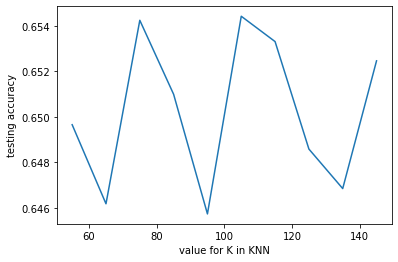

In [39]:
# train a classifier
k_range =range(55,150,10)
scores_list =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the test set
    predictions = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, predictions))
    
plt.plot(k_range,scores_list)
plt.xlabel('value for K in KNN')
plt.ylabel('testing accuracy')
    #print (scores_list)

    #print("precision:\t", precision_score(iris_y_test, predictions, average=None))
    #print("recall:\t\t", recall_score(iris_y_test, predictions, average=None))
    #print("confusion_matrix:\n", confusion_matrix(iris_y_test, predictions))

In [38]:
  print("confusion_matrix:\n", confusion_matrix(y_test, predictions))

confusion_matrix:
 [[8627   33 1132]
 [1374  125 1817]
 [3484   91 5732]]


In [40]:
stop_words = text.ENGLISH_STOP_WORDS.union(['22'])

#stop_words = text.ENGLISH_STOP_WORDS.union(['during','Improper'])

print(stop_words)

frozenset({'more', 'towards', 'wherein', 'were', 'without', 'something', 'is', 'out', 'otherwise', 'thru', 'been', 'a', 'elsewhere', 'one', 'if', 'although', 'onto', 'go', 'couldnt', 'what', 'ten', 'whereas', 'find', 'therein', 'yourself', 'whereby', 'co', 'but', 'last', 'cannot', 'when', 'de', 'are', 'nothing', 'somehow', 'another', 'indeed', 'almost', 'get', 'bill', 'over', 'latterly', 'fifty', 'anywhere', 'here', 'under', 'beside', 'that', 'now', 'anyhow', 'detail', 'too', 'side', 'around', 'eleven', 'same', 'two', 'less', 'bottom', 'top', 'whereafter', 'her', 'beyond', 'formerly', 'seeming', 'fill', 'their', 'this', '22', 'our', 'most', 'do', 'you', 'where', 'off', 'per', 'twelve', 'due', 'ltd', 'should', 'because', 'alone', 'often', 'ourselves', 'might', 'thereby', 'behind', 'among', 'he', 'three', 'him', 'nowhere', 'these', 'everything', 'only', 'etc', 'than', 'across', 'mostly', 'down', 'made', 'many', 'and', 'forty', 'in', 'afterwards', 'always', 'twenty', 'ever', 'by', 'before

In [41]:
# create a fucntion to split the data into training and test sets
def simple_split(data,y,length,split_mark=0.7):
    if split_mark > 0. and split_mark < 1.0:
        n = int(length*split_mark)
    else:
        n = int(split_mark)
    X_train = data[:n].copy()
    X_test = data[n:].copy()
    y_train = y[:n].copy()
    y_test = y[n:].copy()
    
    return X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = simple_split(df.cwe_name,df.cwe_code,len(df))

In [44]:
stop_words = text.ENGLISH_STOP_WORDS.union(['22'])

# convert text to number vector
vectorizer = CountVectorizer(stop_words=stop_words)

# convert text into word features
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62761, 326) (26899, 326) (62761,) (26899,)


In [45]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features: {}\n".format(feature_names[:20]))
print("Middle 20 features: {}\n".format(feature_names[len(feature_names)//2 - 20:len(feature_names)//2]))
print("Last 20 features: {}\n".format(feature_names[len(feature_names) - 20:]))

Number of features: 326
First 20 features: ['7pk', 'access', 'accessible', 'aka', 'algorithm', 'algorithmic', 'allocation', 'amplification', 'argument', 'array', 'assertion', 'assignment', 'assumed', 'asymmetric', 'attempts', 'attributes', 'authentication', 'authenticity', 'authorization', 'blacklist']

Middle 20 features: ['implemented', 'improper', 'improperly', 'inadequate', 'inappropriate', 'inclusion', 'incompatible', 'incomplete', 'inconsistent', 'incorrect', 'incorrectly', 'index', 'indexable', 'inefficient', 'infinite', 'information', 'initialization', 'injection', 'input', 'insecure']

Last 20 features: ['upload', 'url', 'usage', 'use', 'used', 'user', 'using', 'validation', 'value', 'values', 'verification', 'weak', 'web', 'wrap', 'wraparound', 'write', 'wrong', 'xml', 'xpath', 'zero']



In [46]:
clf = KNeighborsClassifier(p=1, n_neighbors=20)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(predictions)

[ 79  79  79 ... 119 119 119]


In [47]:
print(accuracy_score(y_test, predictions))

0.9987731885943716


In [ ]:
k_range =range(5,20,5)
scores_list =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the test set
    predictions = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, predictions))
    
plt.plot(k_range,scores_list)
plt.xlabel('value for K in KNN')
plt.ylabel('testing accuracy')

In [ ]:
print("confusion_matrix:\n", confusion_matrix(y_test, predictions))